# Pymaceuticals Inc.
---
- The Drugs Capomulin and Ramicane show lower overall tumor volume than other drugs such as Infubinol and Ceftamin, indicating that they may successfully bring down tumor size. Tumor size increases up until day 20, and then drops off, indicating that future patients of the drug may see a 20 day delay for benefits.
- Given a correlation coefficient >0.8 (.84), there appears to be a linear correlation between mouse size and tumor size, suggesting that the heavier the mouse, the larger a tumor size is. This can help inform future dosages by patient, altering dosage size by weight.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single DataFrame & displaying preview:
pymaceuticals_data_merged = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
pymaceuticals_data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = len(pymaceuticals_data_merged["Mouse ID"].unique())
mouse_count

249

In [6]:
#Cleaning the data by checking for duplicative data, filtering to Mouse_id and Timepoint to find ID
find_duplicated_rows = pymaceuticals_data_merged.duplicated(subset = ["Mouse ID", "Timepoint"])
duplicated_mice = pymaceuticals_data_merged.loc[find_duplicated_rows,"Mouse ID"].unique()
duplicated_mice


array(['g989'], dtype=object)

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID, ensuring no mice match the duplicated records
clean_data = pymaceuticals_data_merged[pymaceuticals_data_merged["Mouse ID"].isin(duplicated_mice)==False]

In [9]:
# Checking the number of mice in the clean DataFrame.
updated_mouse_count = len(clean_data["Mouse ID"].unique())
updated_mouse_count

248

## Summary Statistics

In [11]:
# Summary Statistic table with key sample measures across tumor volume, grouping by Drug Regimen to determine the best one.
# Data will be used to measure the efficiency of each drug regimen and incorporated into visuals for easy digestion and understanding

mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#combining values into a DataFrame (index = Drug regimen)
summary_table = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance, "Tumor Volume Std Dev":std_dev, "Tumor Volume SEM":sem})

summary_table



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

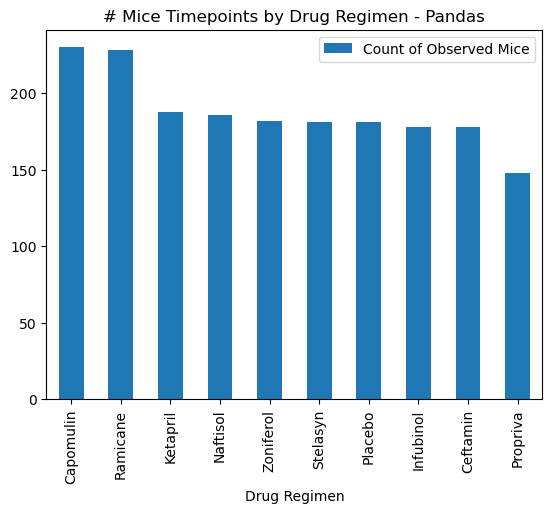

In [80]:
# PANDAS - total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data["Drug Regimen"].value_counts()
x_axis = clean_data["Drug Regimen"].unique()
data_dict = {"Drug Regimen":x_axis, "Count of Observed Mice":counts}
df = pd.DataFrame(data_dict)
df.plot(kind='bar', title= "# Mice Timepoints by Drug Regimen - Pandas")
plt.show()

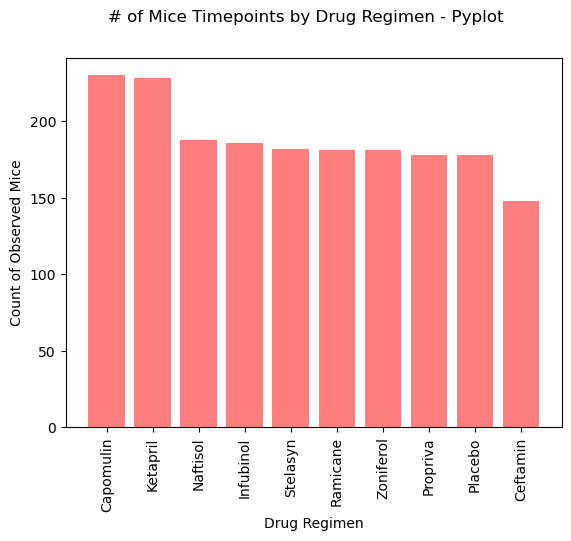

In [81]:
#PLYPLOT - total number of rows (Mouse ID/Timepoints) for each drug regimen using PyPlot.
counts = clean_data["Drug Regimen"].value_counts()
x_axis = clean_data["Drug Regimen"].unique()
plt.bar(x_axis, counts, color='r', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Observed Mice")
plt.suptitle('# of Mice Timepoints by Drug Regimen - Pyplot')
plt.xticks(rotation = 90)
plt.show()

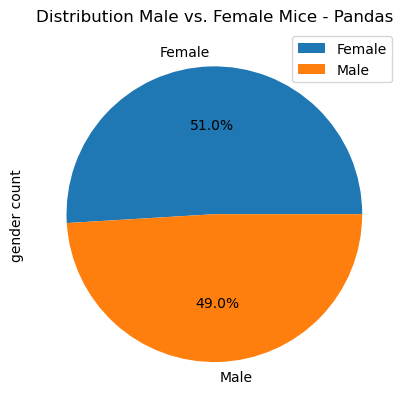

In [78]:
# PANDAS - distribution of unique female versus male mice used in the study
gender = clean_data["Sex"].unique()
gender_count = clean_data["Sex"].value_counts()
data_dict = {"Gender":gender, "gender count":gender_count}
df = pd.DataFrame(data_dict)
df.plot.pie(y="gender count",labels = df["Gender"], autopct="%1.1f%%",title= "Distribution Male vs. Female Mice - Pandas")
plt.show()

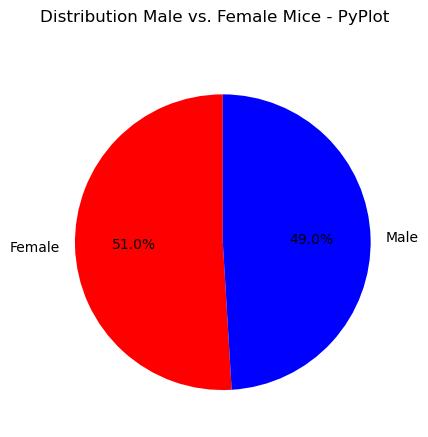

In [79]:
# PYPLOT - distribution of unique female versus male mice used in the study

gender = clean_data["Sex"].unique()
gender_count = clean_data["Sex"].value_counts()
colors = ["red", "blue"]
plt.pie(gender_count, labels=gender, colors = colors, autopct="%1.1f%%", shadow=False, startangle=90)
plt.suptitle('Distribution Male vs. Female Mice - PyPlot')
plt.show()

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor = clean_data.groupby(["Mouse ID"])['Timepoint'].max()
last_tumor = last_tumor.reset_index()
print(last_tumor)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_with_result = last_tumor.merge(clean_data, on=['Mouse ID','Timepoint'], how="left")
print(merged_data_with_result)

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0   

In [83]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_with_result.loc[merged_data_with_result["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


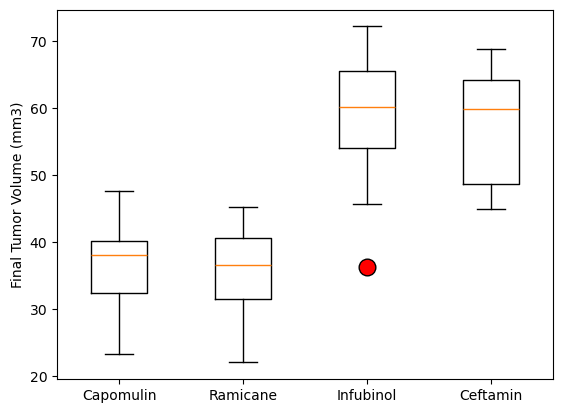

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
mark_outlier_red = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=mark_outlier_red)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

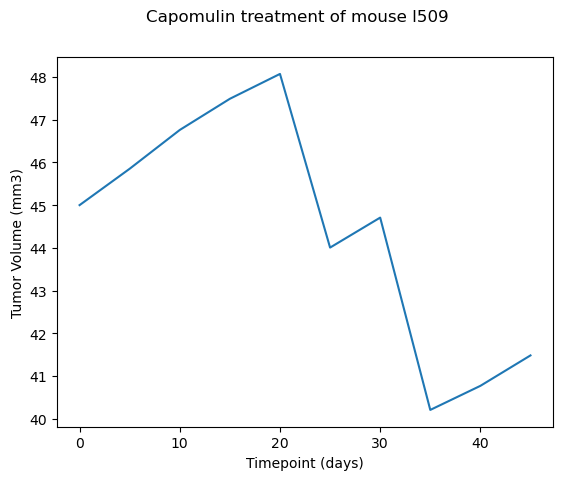

In [85]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.suptitle('Capomulin treatment of mouse l509')
plt.show()

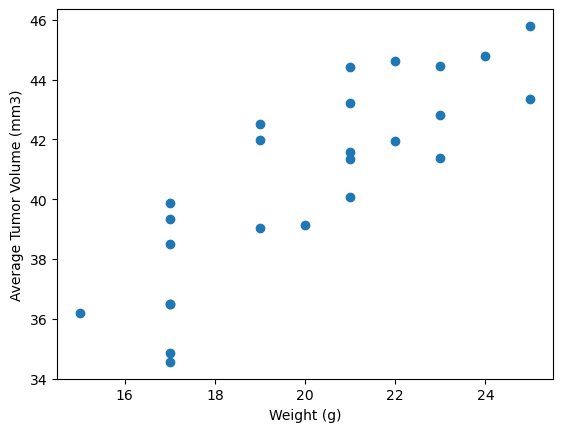

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


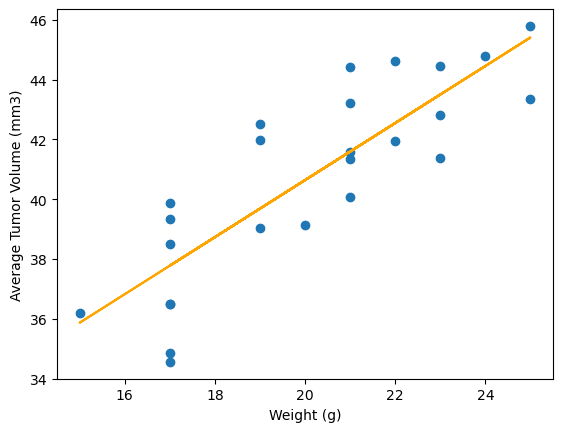

In [87]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="Orange")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()